In [2]:
import pandas as pd

# Sirve para bajo poder de computo
from sklearn.cluster import MiniBatchKMeans

In [3]:
df =pd.read_csv('./candy.csv')
df.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## K-means

In [4]:
X = df.drop('competitorname',axis=1)
kmeans = MiniBatchKMeans(n_clusters=4,batch_size=8).fit(X)
print('Total Centros: ', len(kmeans.cluster_centers_))

Total Centros:  4


In [10]:
df['group'] = kmeans.predict(X)

In [12]:
import seaborn as sns

In [13]:
df.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,group
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,3
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2


<AxesSubplot:xlabel='pricepercent', ylabel='winpercent'>

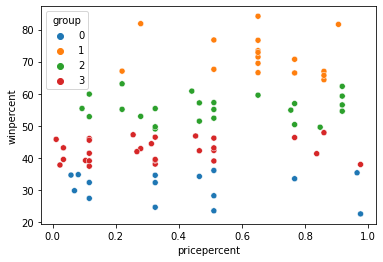

In [19]:
sns.scatterplot(data=df,x='pricepercent',y='winpercent',hue='group',palette='tab10')

## Mean-Shift

In [20]:
from sklearn.cluster import MeanShift

In [21]:
X = df.drop(['competitorname'],axis=1)

In [22]:
meanshift_ = MeanShift().fit(X)
df['group_meanshift'] = meanshift_.labels_

<AxesSubplot:xlabel='pricepercent', ylabel='winpercent'>

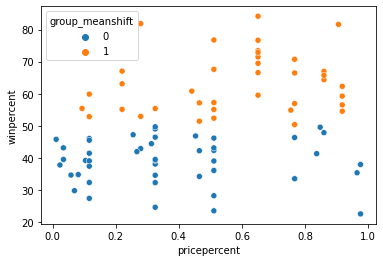

In [24]:
sns.scatterplot(data=df,x='pricepercent',y='winpercent',hue='group_meanshift',palette='tab10')

In [25]:
meanshift_.cluster_centers_

array([[2.25000000e-01, 5.75000000e-01, 1.00000000e-01, 2.50000000e-02,
        5.00000000e-02, 2.50000000e-02, 3.00000000e-01, 1.00000000e-01,
        5.50000000e-01, 4.57599993e-01, 3.67824996e-01, 4.10442122e+01,
        2.25000000e+00],
       [6.07142857e-01, 3.92857143e-01, 2.50000000e-01, 1.42857143e-01,
        1.07142857e-01, 1.42857143e-01, 3.57142857e-02, 4.28571429e-01,
        5.00000000e-01, 5.23535706e-01, 5.57642857e-01, 5.88355186e+01,
        1.75000000e+00]])